# Summer analysis 2023: Specific sites analysis (Public / private / natural greenspaces)

This notebook relates greenn spaces (ndvi without locations with water, marshy surfaces, artificial structures, rocks adn clouds) and moisture (ndmi only for zones with little variation in moisture) in three specific sites within each city in order to find ndmi_diff variations (which may indicate irrigation).

## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
city = 'Guadalajara'
res = 10

## Data download

Data download - NDVI

In [3]:
# Downloading NDVI res data
ndvi_schema = 'raster_analysis'
ndvi_table = 'ndvi_analysis_hex'

query = f"SELECT * FROM {ndvi_schema}.{ndvi_table} WHERE \"city\" LIKE \'{city}\' AND \"res\"={res}"
ndvi_res10 = aup.gdf_from_query(query, geometry_col='geometry')

print(ndvi_res10.shape)
ndvi_res10.head(2)

(58163, 11)


,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city
0,8a49ab59e427fff,"POLYGON ((-103.41506 20.66053, -103.41441 20.6...",10,0.139937,0.030804,0.152078,0.158324,0.083020,0.075304,-0.000750,Guadalajara
1,8a49ab4b2717fff,"POLYGON ((-103.38873 20.74741, -103.38808 20.7...",10,0.299616,0.106006,0.296429,0.427786,0.154227,0.273559,-0.002171,Guadalajara


Data download - NDMI

In [4]:
# Downloading NDMI res 10 data
ndmi_schema = 'raster_analysis'
ndmi_table = 'ndmi_analysis_hex'

query = f"SELECT * FROM {ndmi_schema}.{ndmi_table} WHERE \"city\" LIKE \'{city}\' AND \"res\"={res}"
ndmi_res10 = aup.gdf_from_query(query, geometry_col='geometry')

print(ndmi_res10.shape)
ndmi_res10.head(2)

(58163, 11)


,hex_id,geometry,res,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,city
0,8a49ab4b2687fff,"POLYGON ((-103.38645 20.75213, -103.38580 20.7...",10,-0.027466,0.052524,-0.043436,0.084282,-0.066300,0.150582,0.000106,Guadalajara
1,8a49ab4b275ffff,"POLYGON ((-103.39252 20.75042, -103.39187 20.7...",10,-0.040961,0.052895,-0.054797,0.069439,-0.077106,0.146545,-0.000029,Guadalajara


In [5]:
specificsites = gpd.read_file("../../../data/external/temporal_todocker/specificsites_ndvi_ndmi.gpkg")
specificsites.head(10)

,city,type,geometry
0,Monterrey,private,"POLYGON ((-100.35273 25.64910, -100.35280 25.6..."
1,Monterrey,public,"POLYGON ((-100.29794 25.67408, -100.29807 25.6..."
2,Monterrey,natural,"POLYGON ((-100.25053 25.65942, -100.24950 25.6..."
3,Guadalajara,public,"POLYGON ((-103.43897 20.66423, -103.43901 20.6..."
4,Guadalajara,private,"POLYGON ((-103.37298 20.70116, -103.37339 20.7..."
5,Guadalajara,natural,"POLYGON ((-103.28531 20.70466, -103.28478 20.7..."


## Data treatment

### Data treatment - Vegetation categories

In [6]:
# NDVI res 10 processing
# Creating vegetation categories
ndvi_res10['ndvi_median_rango'] = np.nan
ndvi_res10.loc[ndvi_res10.ndvi_median>=0.6 , 'ndvi_median_rango'] = 'Alta densidad vegetal'
ndvi_res10.loc[(ndvi_res10.ndvi_median>=0.4 )&
             (ndvi_res10.ndvi_median<0.6), 'ndvi_median_rango'] = 'Moderada densidad vegetal'
ndvi_res10.loc[(ndvi_res10.ndvi_median>=0.2)&
             (ndvi_res10.ndvi_median<0.4), 'ndvi_median_rango'] = 'Mínima densidad vegetal'
ndvi_res10.loc[(ndvi_res10.ndvi_median>=0.1)&
             (ndvi_res10.ndvi_median<0.2), 'ndvi_median_rango'] = 'Suelo'
ndvi_res10.loc[(ndvi_res10.ndvi_median<0.1), 'ndvi_median_rango'] = 'Suelo artificial/Agua/Piedra'

# Ordering data
categories = ['Suelo artificial/Agua/Piedra', 'Suelo', 'Mínima densidad vegetal', 'Moderada densidad vegetal', 'Alta densidad vegetal']
ndvi_res10['ndvi_median_rango'] = pd.Categorical(ndvi_res10['ndvi_median_rango'], categories=categories, ordered=True)

# Reviewing process
print(ndvi_res10.shape)
ndvi_res10.head(2)

(58163, 12)


,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city,ndvi_median_rango
0,8a49ab59e427fff,"POLYGON ((-103.41506 20.66053, -103.41441 20.6...",10,0.139937,0.030804,0.152078,0.158324,0.083020,0.075304,-0.000750,Guadalajara,Suelo
1,8a49ab4b2717fff,"POLYGON ((-103.38873 20.74741, -103.38808 20.7...",10,0.299616,0.106006,0.296429,0.427786,0.154227,0.273559,-0.002171,Guadalajara,Mínima densidad vegetal


### Data treatment - NDVI filtering for places with vegetation

In [7]:
#Keeping High-moderate-minimal vegetation density
ndvi_withveg_res10 = ndvi_res10.loc[(ndvi_res10.ndvi_median_rango == 'Alta densidad vegetal') |
                   (ndvi_res10.ndvi_median_rango == 'Moderada densidad vegetal')|
                   (ndvi_res10.ndvi_median_rango == 'Mínima densidad vegetal')]

#Reviewing process
print(ndvi_withveg_res10.shape)
ndvi_withveg_res10.head(2)

(34361, 12)


,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city,ndvi_median_rango
1,8a49ab4b2717fff,"POLYGON ((-103.38873 20.74741, -103.38808 20.7...",10,0.299616,0.106006,0.296429,0.427786,0.154227,0.273559,-0.002171,Guadalajara,Mínima densidad vegetal
2,8a49ab4b2607fff,"POLYGON ((-103.38977 20.75068, -103.38912 20.7...",10,0.317337,0.077003,0.348129,0.377489,0.200232,0.177257,-0.001615,Guadalajara,Mínima densidad vegetal


### Data treatment - Merging NDVI and NDMI

In [8]:
ndmi_res10_clean = ndmi_res10.drop(columns=['geometry','res','city'])
ndvi_ndmi_res10 = ndvi_withveg_res10.merge(ndmi_res10_clean, left_on='hex_id', right_on='hex_id')

#Reviewing process
print(ndvi_ndmi_res10.shape)
ndvi_ndmi_res10.head(2)

(34361, 19)


,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city,ndvi_median_rango,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend
0,8a49ab4b2717fff,"POLYGON ((-103.38873 20.74741, -103.38808 20.7...",10,0.299616,0.106006,0.296429,0.427786,0.154227,0.273559,-0.002171,Guadalajara,Mínima densidad vegetal,0.040085,0.073231,0.034313,0.161902,-0.058020,0.219922,0.000142
1,8a49ab4b2607fff,"POLYGON ((-103.38977 20.75068, -103.38912 20.7...",10,0.317337,0.077003,0.348129,0.377489,0.200232,0.177257,-0.001615,Guadalajara,Mínima densidad vegetal,0.014909,0.051986,0.009807,0.110317,-0.037298,0.147615,-0.000163


## Data analysis - Boxplot

### Data analysis - Isolate ndmi data for specific green spaces

In [9]:
city_sites = specificsites.loc[specificsites.city == city]
city_sites.head()                         

,city,type,geometry
3,Guadalajara,public,"POLYGON ((-103.43897 20.66423, -103.43901 20.6..."
4,Guadalajara,private,"POLYGON ((-103.37298 20.70116, -103.37339 20.7..."
5,Guadalajara,natural,"POLYGON ((-103.28531 20.70466, -103.28478 20.7..."


In [10]:
ndmi_res10_citysites = ndvi_ndmi_res10.overlay(city_sites)

ndmi_res10_citysites = ndmi_res10_citysites.rename(columns = {'type':'greenspace'})


#Show dataframe
print(ndmi_res10_citysites.shape)
ndmi_res10_citysites.head(2)

(502, 21)


,hex_id,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city_1,...,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,city_2,greenspace,geometry
0,8a498c94ab1ffff,10,0.303857,0.133622,0.302367,0.466649,0.127199,0.339450,-0.002491,Guadalajara,...,0.020572,0.072797,0.014754,0.135790,-0.075343,0.211132,-0.000699,Guadalajara,natural,"POLYGON ((-103.33523 20.74692, -103.33516 20.7..."
1,8a498c94aba7fff,10,0.352945,0.175679,0.321045,0.567457,0.142818,0.424639,-0.003503,Guadalajara,...,0.019950,0.094934,0.009771,0.167631,-0.097873,0.265503,-0.000784,Guadalajara,natural,"POLYGON ((-103.33443 20.74587, -103.33378 20.7..."


<Axes: >

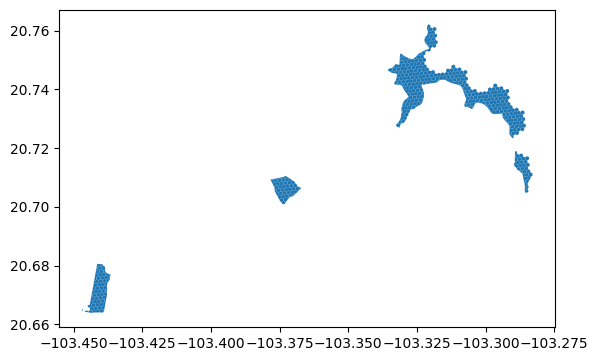

In [11]:
ndmi_res10_citysites.plot()

In [12]:
#Ordening data
categories = ['private', 'public', 'natural']
ndmi_res10_citysites['greenspace'] = pd.Categorical(ndmi_res10_citysites['greenspace'], categories=categories, ordered=True)
ndmi_res10_citysites = ndmi_res10_citysites.sort_values('greenspace')

     index  greenspace
2  private          52
1   public          71
0  natural         379


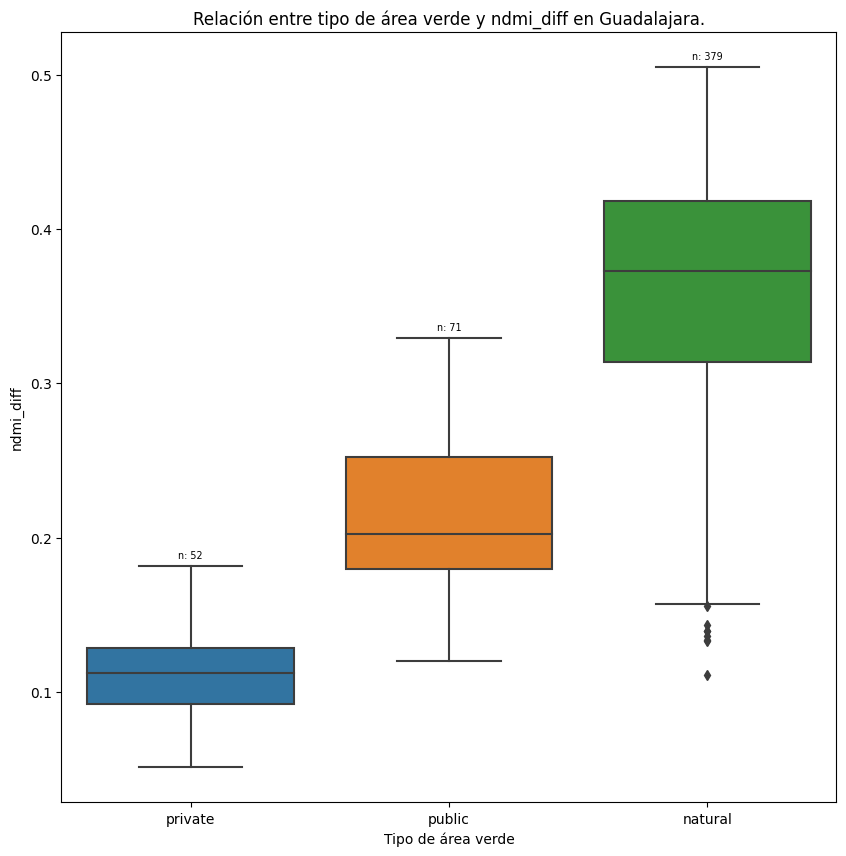

In [13]:
#Plotting
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=np.array(ndmi_res10_citysites.greenspace) , y=np.array(ndmi_res10_citysites.ndmi_diff), ax=ax)

#Format
plt.title('Relación entre tipo de área verde y ndmi_diff en {}.'.format(city))
plt.xlabel('Tipo de área verde')
plt.ylabel('ndmi_diff')

# ------------------------------------------- Add number of hex by greenspace type -------------------------------------------

#Calculate median of each greenspace type group to position number of observations
maxs = ndmi_res10_citysites.groupby(['greenspace'])['ndmi_diff'].max()
num_maxs = maxs.values
#Drop NaNs
num_maxs = num_maxs[~np.isnan(num_maxs)]

# Calculate number of observations per group
obs = ndmi_res10_citysites['greenspace'].value_counts()
obs = obs.reset_index()
obs = obs.sort_values('index')
print(obs)
#Drop Ceros by turning them to nans
obs = obs['greenspace'].apply(lambda x: np.nan if x==0 else x)
obs = obs[~np.isnan(obs)]

num_obs = obs.values
num_obs = [str(x) for x in num_obs.tolist()]
num_obs = ["n: " + i for i in num_obs]

# Add it to the plot
pos = range(len(num_obs))
for tick,label in zip(pos,ax.get_xticklabels()):
    #ax.text(x,y,text)
    ax.text(pos[tick],
            num_maxs[tick] + 0.005,
            num_obs[tick],
            horizontalalignment='center',
            size='x-small',
            color='black')
# ------------------------------------------- ------------------------------------------- -------------------------------------------

#Para plotear figuras quitar # 
plt.savefig("../../../output/figures/ndvi_ndmi_marg_bycity/{}/ndmidiff_greenspaces_boxplot_{}.svg".format(city.lower(),city.lower()))

## Data analysis - Maps - Work in progress

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x500 with 0 Axes>

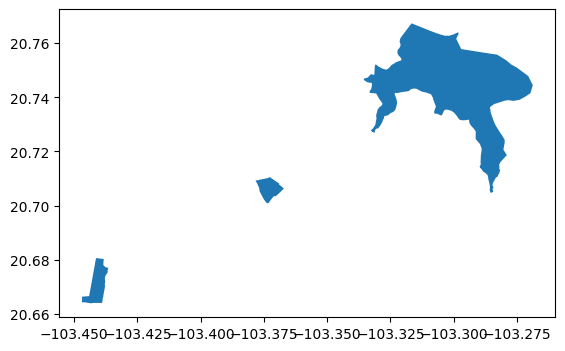

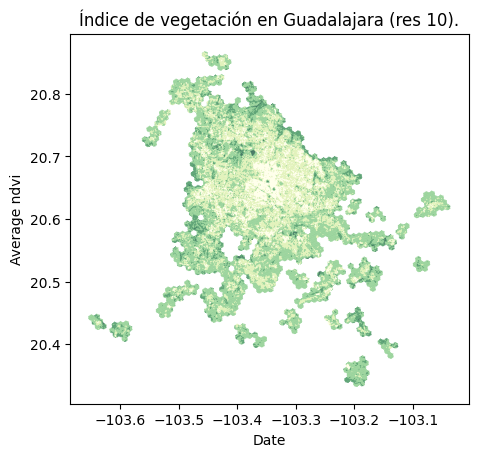

In [15]:
#fig, ax = plt.subplots(1,1,figsize=(12,6))

#ndvi_ndmi_res10.plot('ndmi_diff', 'viridis', ax=ax[0], legend=True)
plt.figure(figsize=(10,5))
city_sites.plot()
ndvi_res10.plot('ndvi_median_rango', 'YlGn', legend=True)

# ---------- Format ----------
# Format - Titles
plt.title('Índice de vegetación en {} (res {}).'.format(city,res))
plt.xlabel('Date')
plt.ylabel('Average ndvi')

# Format - Legend
plt.legend(frameon=False, 
           fontsize = 7)

# Guardar gráficos
#plt.savefig("../../../output/figures/ndvi_ndmi/ndmi_diff_{}.svg".format(city.lower()))